<a href="https://colab.research.google.com/github/k1151msarandega/QuCode-21-Days-of-Quantum-Challenge-Diary/blob/main/Day08_Qubits_%26_Bloch_Sphere_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 08 — Qubits & Bloch Sphere Representation

> _QuCode 21 Days of Quantum Challenge — Learning notebook_
>
> **Date:** 2025-09-08  
> **Author:** Kudzai Musarandega  
> **Tags:** quantum, learning, challenge, day-08
>
> **Learning objectives**
> - **Define** a single-qubit pure state as
  $$
  |\psi\rangle = \alpha|0\rangle + \beta|1\rangle,\quad
  |\alpha|^2+|\beta|^2=1.
  $$
>
> - **Explain** how superposition differs from classical bits and why normalization is required.
>
> - **Represent** qubit states geometrically on the **Bloch sphere** using angles $(\theta,\phi)$:
  $$
  |\psi(\theta,\phi)\rangle = \cos\frac{\theta}{2}\,|0\rangle + e^{i\phi}\sin\frac{\theta}{2}\,|1\rangle.
  $$

> - **Connect** single-qubit gates (Pauli $X,Y,Z$, Hadamard $H$, rotation gates $R_n(\vartheta)$) to rotations of the Bloch vector.
>
> - **Visualise** gate action as rotations around $x,y,z$ axes (and combinations thereof) on the Bloch sphere.
>
> - **Compute** measurement probabilities along $z$ and arbitrary axes via
  $$
  P(\pm)=\tfrac{1\pm \mathbf n\cdot \mathbf r}{2}.
  $$

> - **Perform** basic state tomography by estimating Pauli expectations $\langle\sigma_x\rangle,\langle\sigma_y\rangle,\langle\sigma_z\rangle$.
>
> - **Relate** unitary matrices in SU(2) to rotations in SO(3), reinforcing the geometric picture.
>
> - **Practice** hands-on tasks:
      - simulate measurement outcomes and compare with theoretical probabilities,  
      - reconstruct states from Pauli measurements,  
      - plot Bloch-sphere trajectories under repeated unitaries.
>
>
> **Key takeaways (summary-first)**
> - Any pure qubit is a point on the **Bloch sphere**; global phase is irrelevant.
> - Single-qubit **unitaries** correspond to **rotations** of the Bloch vector.
> - **Pauli** gates are $\pi$-rotations; **$R_n(\vartheta)$** are arbitrary rotations.
> - The **Hadamard** gate rotates about an axis in the $XZ$-plane, mapping computational to $X$-basis states.
> - Expectation of Pauli operators recovers the Bloch coordinates:
  $$
  (x,y,z)=\big(\langle\sigma_x\rangle,\langle\sigma_y\rangle,\langle\sigma_z\rangle\big).
  $$



## Resources
- **Official/Assigned:**
    - [Professor Nano: Single qubit and its logic gates](https://youtu.be/rD_fH7O-D5Y?si=8iivBlMv9qeChmfR)
    - [Quantum Soar: Representing a Qubit on the Bloch Sphere](https://youtu.be/4EGY4ajn1Iw?si=XBDbGjT5QUHVcL7u)
    - [UV Physics: Bloch sphere and Qubit Representation](https://youtu.be/nVpj3_NOvRI?si=V_jbQ24Y9ZYoslaD)
- **Extra reading:**
- **Original notes:**


In [ ]:
# %% [markdown]
# ### Environment setup (Colab)
# If you are running on Colab for the first time today, uncomment to install.
# This cell intentionally avoids heavy installs by default.
#
# !pip -q install qiskit pennylane matplotlib numpy

import sys, platform, math, json, numpy as np

print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
np.random.seed(42)


## 1) Concepts in Brief

- A **qubit** lives in a 2D complex Hilbert space with computational basis $\{|0\rangle, |1\rangle\}$.
- A general **pure state** is
  $$
  |\psi\rangle = \alpha|0\rangle + \beta|1\rangle, \qquad \alpha,\beta\in\mathbb C,\quad |\alpha|^2+|\beta|^2=1.
  $$
- **Global phase** is unobservable: $e^{i\gamma}|\psi\rangle$ represents the same physical state.
- Any pure qubit can be written (up to global phase) as
  $$
  |\psi(\theta,\phi)\rangle=\cos\frac{\theta}{2}\,|0\rangle + e^{i\phi}\sin\frac{\theta}{2}\,|1\rangle,\quad
  \theta\in[0,\pi],\ \phi\in[0,2\pi).
  $$
- The **Bloch vector** $\mathbf r=(x,y,z)$ represents $|\psi\rangle$ as a point on the unit sphere:
  $$
  x=\sin\theta\cos\phi,\quad y=\sin\theta\sin\phi,\quad z=\cos\theta.
  $$
- **Single-qubit gates** are $2\times2$ **unitary** matrices (probability conserving). Pauli and standard gates:
  $$
  X=\begin{bmatrix}0&1\\1&0\end{bmatrix},\
  Y=\begin{bmatrix}0&-i\\ i&0\end{bmatrix},\
  Z=\begin{bmatrix}1&0\\0&-1\end{bmatrix},\
  H=\tfrac{1}{\sqrt2}\begin{bmatrix}1&1\\1&-1\end{bmatrix}.
  $$
  Phase gates: $S=\mathrm{diag}(1,i),\ T=\mathrm{diag}(1,e^{i\pi/4})$.
- **Rotation gates** about axis $n\in\{x,y,z\}$:
  $$
  R_n(\vartheta)=e^{-i\frac{\vartheta}{2}\sigma_n}
  =\cos\frac{\vartheta}{2}\,I - i\sin\frac{\vartheta}{2}\,\sigma_n.
  $$
- **Action on Bloch sphere:** Any single-qubit unitary acts as a rotation of the Bloch vector $\mathbf r\mapsto R\,\mathbf r$.


## 2) From State Vector to Bloch Vector

Given a (normalised) column vector $|\psi\rangle=\begin{bmatrix}\alpha\\\beta\end{bmatrix}$,
$$
\mathbf r=\big(\langle \sigma_x\rangle,\langle \sigma_y\rangle,\langle \sigma_z\rangle\big),
\quad
\langle \sigma_k\rangle=\langle\psi|\sigma_k|\psi\rangle.
$$
Equivalently,
$$
x=2\,\mathrm{Re}(\alpha^*\beta),\quad
y=2\,\mathrm{Im}(\alpha^*\beta),\quad
z=|\alpha|^2-|\beta|^2.
$$


## 3) Gate Intuition on the Sphere

- $X$ is a $\pi$ rotation about the $x$-axis: north pole $\leftrightarrow$ south pole.
- $Z$ is a $\pi$ rotation about the $z$-axis: flips equatorial $|+\rangle \leftrightarrow |-\rangle$.
- $Y$ is a $\pi$ rotation about the $y$-axis.
- $H$ is a $\pi$ rotation about the axis $\tfrac{1}{\sqrt2}(1,0,1)$: maps $|0\rangle\mapsto|+\rangle$, $|1\rangle\mapsto|-\rangle$.


In [1]:
# (Quietly install optional helper if you want nicer arrows — not strictly required)
!pip install --quiet numpy matplotlib


## 5) Imports & Base Objects


In [2]:
## 5) Imports & Base Objects

import numpy as np
import matplotlib.pyplot as plt

# Pauli matrices & common gates
I2 = np.eye(2, dtype=complex)
X  = np.array([[0,1],[1,0]], dtype=complex)
Y  = np.array([[0,-1j],[1j,0]], dtype=complex)
Z  = np.array([[1,0],[0,-1]], dtype=complex)
H  = (1/np.sqrt(2)) * np.array([[1,1],[1,-1]], dtype=complex)
S  = np.array([[1,0],[0,1j]], dtype=complex)
T  = np.array([[1,0],[0,np.exp(1j*np.pi/4)]], dtype=complex)

paulis = {'X':X,'Y':Y,'Z':Z}

def Rx(theta): return np.cos(theta/2)*I2 - 1j*np.sin(theta/2)*X
def Ry(theta): return np.cos(theta/2)*I2 - 1j*np.sin(theta/2)*Y
def Rz(theta): return np.cos(theta/2)*I2 - 1j*np.sin(theta/2)*Z

# Basis kets
ket0 = np.array([[1.0],[0.0]], dtype=complex)
ket1 = np.array([[0.0],[1.0]], dtype=complex)
ketp = (ket0+ket1)/np.sqrt(2)
ketm = (ket0-ket1)/np.sqrt(2)


## 6) State ↔ Bloch Conversions & Utilities


In [3]:
## 6) State ↔ Bloch Conversions & Utilities

def normalize(psi):
    n = np.linalg.norm(psi)
    if n == 0:
        raise ValueError("Zero vector cannot be normalized.")
    return psi / n

def state_to_bloch(psi):
    """Return Bloch vector (x,y,z) for a normalized state psi (2x1)."""
    psi = normalize(psi)
    a, b = psi[0,0], psi[1,0]
    x = 2*np.real(np.conjugate(a)*b)
    y = 2*np.imag(np.conjugate(a)*b)
    z = (np.abs(a)**2 - np.abs(b)**2).real
    return np.array([x,y,z], dtype=float)

def bloch_to_angles(r):
    """Given Bloch vector r (unit), return (theta, phi)."""
    x,y,z = r
    theta = np.arccos(np.clip(z, -1.0, 1.0))
    phi = (np.arctan2(y, x)) % (2*np.pi)
    return theta, phi

def angles_to_state(theta, phi):
    """Return |psi> = cos(theta/2)|0> + e^{i phi} sin(theta/2)|1>."""
    a = np.cos(theta/2)
    b = np.exp(1j*phi)*np.sin(theta/2)
    return normalize(np.array([[a],[b]], dtype=complex))

def is_unitary(U, atol=1e-10):
    return np.allclose(U.conj().T @ U, I2, atol=atol)


## 7) Plotting the Bloch Sphere (with labels)


In [4]:
## 7) Plotting the Bloch Sphere (with labels)

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def plot_bloch_sphere(ax=None, elev=20, azim=-60, radius=1.0):
    if ax is None:
        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(111, projection='3d')

    # Sphere mesh
    u = np.linspace(0, 2*np.pi, 100)
    v = np.linspace(0, np.pi, 50)
    x = radius*np.outer(np.cos(u), np.sin(v))
    y = radius*np.outer(np.sin(u), np.sin(v))
    z = radius*np.outer(np.ones_like(u), np.cos(v))
    ax.plot_surface(x, y, z, rstride=6, cstride=6, alpha=0.08, edgecolor='none')

    # Axes
    ax.quiver(0,0,0, 1.0,0,0, length=1.0, color='r', linewidth=1.5)
    ax.quiver(0,0,0, 0,1.0,0, length=1.0, color='g', linewidth=1.5)
    ax.quiver(0,0,0, 0,0,1.0, length=1.0, color='b', linewidth=1.5)
    ax.text(1.08,0,0, 'X', color='r', fontsize=12)
    ax.text(0,1.08,0, 'Y', color='g', fontsize=12)
    ax.text(0,0,1.08, 'Z', color='b', fontsize=12)

    # Basis labels
    ax.text(0,0,  1.05, r'$|0\rangle$', ha='center', va='center', fontsize=12)
    ax.text(0,0, -1.10, r'$|1\rangle$', ha='center', va='center', fontsize=12)
    ax.text( 1.05,0,0, r'$|+\rangle$', ha='center', va='center', fontsize=12)
    ax.text(-1.05,0,0, r'$|-\rangle$', ha='center', va='center', fontsize=12)
    ax.text(0, 1.05,0, r'$|+i\rangle$', ha='center', va='center', fontsize=12)
    ax.text(0,-1.05,0, r'$|-i\rangle$', ha='center', va='center', fontsize=12)

    # Style
    ax.set_box_aspect([1,1,1])
    ax.set_xlim([-1.1,1.1]); ax.set_ylim([-1.1,1.1]); ax.set_zlim([-1.1,1.1])
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    ax.view_init(elev=elev, azim=azim)
    return ax

def plot_state(ax, psi, **kwargs):
    r = state_to_bloch(psi)
    ax.scatter([r[0]],[r[1]],[r[2]], s=60, **kwargs)
    return r


## 8) Quick Checks: States and Gates


Is H unitary? True
Is Rx(0.7) unitary? True
Is S unitary? True


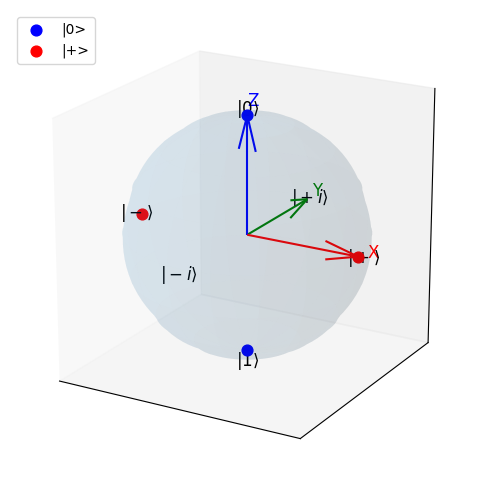

In [5]:
## 8) Quick Checks: States and Gates

# Check unitary
print("Is H unitary?", is_unitary(H))
print("Is Rx(0.7) unitary?", is_unitary(Rx(0.7)))
print("Is S unitary?", is_unitary(S))

# Show a few states on the sphere
ax = plot_bloch_sphere()
plot_state(ax, ket0, color='b', label='|0>')
plot_state(ax, ket1, color='b')
plot_state(ax, ketp, color='r', label='|+>')
plot_state(ax, ketm, color='r')
ax.legend(loc='upper left')
plt.show()


## 9) Trajectories Under Gate Sequences
We’ll start at $|0\rangle$, apply a sequence of gates, and plot the path on the Bloch sphere.


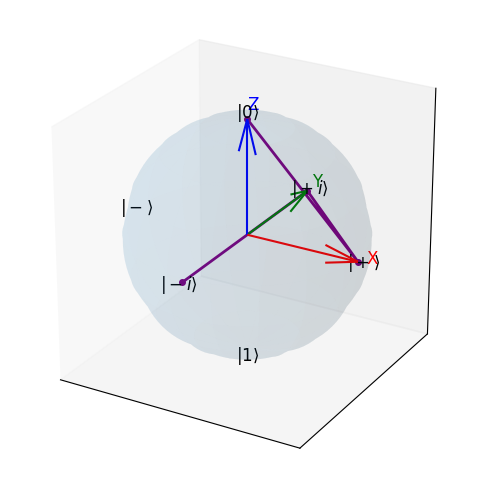

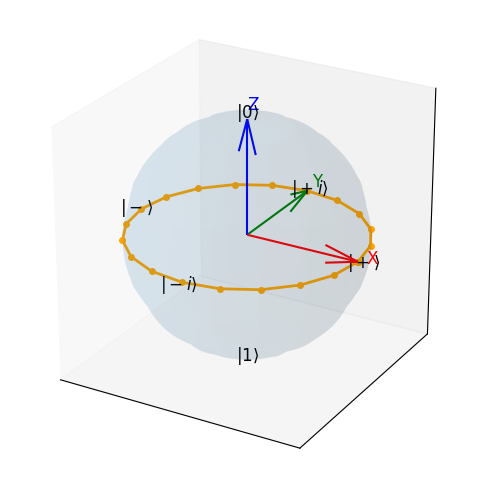

In [6]:
## 9) Trajectories Under Gate Sequences

def apply_sequence(psi0, gates):
    states = [normalize(psi0)]
    for G in gates:
        states.append(normalize(G @ states[-1]))
    return states

def plot_path_on_bloch(states, elev=25, azim=-60, color='k'):
    ax = plot_bloch_sphere(elev=elev, azim=azim)
    R = np.stack([state_to_bloch(s) for s in states], axis=0)
    ax.plot(R[:,0], R[:,1], R[:,2], '-o', color=color, linewidth=2, markersize=4)
    return ax

# Example 1: |0> --H--> |+> --Rz(pi/2)--> |+i> --Rx(pi)--> point mirrored across X
seq1 = [H, Rz(np.pi/2), Rx(np.pi)]
states1 = apply_sequence(ket0, seq1)
ax = plot_path_on_bloch(states1, color='purple')
plt.show()

# Example 2: Equatorial rotation via Rz
psi_eq = H @ ket0  # |+>
states2 = [psi_eq] + [Rz(t) @ psi_eq for t in np.linspace(0, 2*np.pi, 21)]
ax = plot_path_on_bloch(states2, color='orange')
plt.show()


## 10) Verify Gate as Bloch Rotation

For a unitary $U$, define the Bloch vector before/after: $\mathbf r \mapsto \mathbf r'$. On pure states,
$$
r_k' = \langle \psi|U^\dagger \sigma_k U|\psi\rangle
= \sum_j R_{kj}\, r_j,
$$
so there exists a real rotation $R\in SO(3)$ induced by $U$.
Below we numerically extract $R$ by acting on the Pauli basis. (For a single qubit, $R_{kj}=\tfrac12\mathrm{Tr}\big(\sigma_k U\,\sigma_j U^\dagger\big)$.)


In [7]:
## 10) Verify Gate as Bloch Rotation

def su2_to_so3(U):
    """Return the 3x3 real rotation matrix R induced by 2x2 unitary U on Bloch vectors."""
    sig = [X, Y, Z]
    R = np.zeros((3,3), dtype=float)
    for k in range(3):
        for j in range(3):
            R[k,j] = 0.5*np.trace(sig[k] @ (U @ sig[j] @ U.conj().T)).real
    return R

def rotate_r(R, r):
    return R @ r

U = Rx(np.pi/3)  # 60° about x
R = su2_to_so3(U)
print("SO(3) rotation from Rx(pi/3):\n", R)

# Test on a random state
theta, phi = 1.1, 0.7
psi = angles_to_state(theta, phi)
r  = state_to_bloch(psi)
rU = state_to_bloch(U @ psi)
rR = rotate_r(R, r)
print("‖rU - R r‖:", np.linalg.norm(rU - rR))


SO(3) rotation from Rx(pi/3):
 [[ 1.         0.         0.       ]
 [ 0.         0.5       -0.8660254]
 [ 0.         0.8660254  0.5      ]]
‖rU - R r‖: 2.7755575615628914e-17


## 11) Mini-Lab: Create Your Own Trajectory (Submission)

1. Pick an initial state by angles $(\theta,\phi)$:
   $$
   |\psi_0\rangle=\cos\frac{\theta}{2}|0\rangle + e^{i\phi}\sin\frac{\theta}{2}|1\rangle.
   $$
2. Build a gate sequence using `X, Y, Z, H, S, T, Rx, Ry, Rz`.
3. Plot the trajectory on the Bloch sphere and **annotate** your start/end.

**Submission artifact:** include the final figure and print the start/end $(\theta,\phi)$ and Bloch vectors.


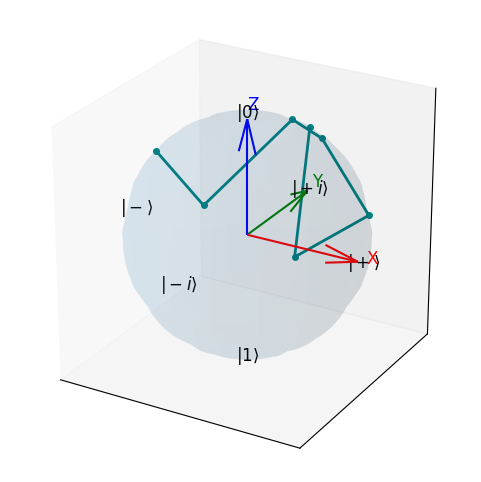

Start (theta, phi): (0.7000000000000001, 1.2)
Start Bloch r: [0.23343727 0.60043606 0.76484219]
End   (theta, phi): (0.9390308177898303, 3.2389055688858095)
End   Bloch r: [-0.80316812 -0.07840629  0.59057042]


In [8]:
## 11) Mini-Lab: Create Your Own Trajectory (Submission)
# === Your trajectory here (edit freely) ===
theta0, phi0 = 0.7, 1.2
psi0 = angles_to_state(theta0, phi0)

seq = [
    H,
    Rz(np.pi/3),
    Ry(-np.pi/4),
    T,
    Rx(np.pi/2),
    S.conj().T  # S^\dagger
]

states = apply_sequence(psi0, seq)
ax = plot_path_on_bloch(states, color='teal')
plt.show()

# Report start/end
r_start = state_to_bloch(psi0)
r_end   = state_to_bloch(states[-1])
th_start, ph_start = bloch_to_angles(r_start)
th_end,   ph_end   = bloch_to_angles(r_end)

print("Start (theta, phi):", (float(th_start), float(ph_start)))
print("Start Bloch r:", r_start)
print("End   (theta, phi):", (float(th_end), float(ph_end)))
print("End   Bloch r:", r_end)


## 12) Gate Gallery (quick sanity checks)

- $X|0\rangle=|1\rangle,\quad X|1\rangle=|0\rangle$  
- $Z|+\rangle=|-\rangle,\quad Z|-\rangle=|+\rangle$  
- $H|0\rangle=|+\rangle,\quad H|1\rangle=|-\rangle$  
- $R_z(\varphi)\,|+\rangle = \tfrac{1}{\sqrt2}\big(|0\rangle + e^{i\varphi}|1\rangle\big)$ (equatorial rotation).


In [9]:
%%markdown
## 12) Gate Gallery (quick sanity checks)

print("X|0> ->", (X@ket0).ravel())
print("X|1> ->", (X@ket1).ravel())
print("H|0> ->", (H@ket0).ravel(), "  (should be |+>)")
print("H|1> ->", (H@ket1).ravel(), "  (should be |->)")

phi = np.pi/2
psi = Rz(phi) @ ketp
print("Rz(pi/2)|+> ->", psi.ravel(), "  (|0> + i|1>)/√2")


## 12) Gate Gallery (quick sanity checks)

print("X|0> ->", (X@ket0).ravel())
print("X|1> ->", (X@ket1).ravel())
print("H|0> ->", (H@ket0).ravel(), "  (should be |+>)")
print("H|1> ->", (H@ket1).ravel(), "  (should be |->)")

phi = np.pi/2
psi = Rz(phi) @ ketp
print("Rz(pi/2)|+> ->", psi.ravel(), "  (|0> + i|1>)/√2")


## 14) Exercises

1. **Rebuild $H$ from rotations.** Show numerically that
   $$
   H \propto R_y\!\left(\tfrac{\pi}{2}\right) Z
   \quad\text{or}\quad
   H \propto R_x(\pi)\,R_z\!\left(\tfrac{\pi}{2}\right)\,R_x(\pi)
   $$
   up to a global phase. (Check equality up to phase.)
2. **Axis detection.** For $U=R_y(\vartheta)$, compute $R=\text{su2\_to\_so3}(U)$ and confirm it’s a rotation by angle $\vartheta$ about $y$ (eigenvector/eigenvalue of $R$).
3. **Phase gates.** Verify that $S$ and $T$ leave $z$ unchanged (they rotate around $z$). Plot equatorial paths for $|+\rangle$ under $S$ and $T$ powers.
4. **Random unitary.** Sample random $U\in\mathrm{SU}(2)$ via Euler angles and plot its rotation matrix $R$; confirm $\det R=1$ and $R^\top R=I$.


## (Optional) Helper: Compare Unitaries Up to Global Phase

In [10]:
## (Optional) Helper: Compare Unitaries Up to Global Phase

def equal_up_to_global_phase(U, V, atol=1e-8):
    """Return True if U and V are equal up to a global phase."""
    # Find a nonzero entry to extract relative phase
    idx = np.unravel_index(np.argmax(np.abs(V)), V.shape)
    if np.abs(V[idx]) < 1e-14:
        return np.allclose(U, V, atol=atol)  # both near-zero? trivial
    phase = V[idx] / U[idx]
    return np.allclose(V, phase*U, atol=atol)

# Example check: build H via rotations (one possible decomposition)
cand = Ry(np.pi/2) @ Z
print("H ~ Ry(pi/2) Z (up to phase)?", equal_up_to_global_phase(H, cand))


H ~ Ry(pi/2) Z (up to phase)? True


## 15) Measurement on the Bloch Sphere

Given a pure state $|\psi(\theta,\phi)\rangle$, the probability of obtaining outcome $0$ (projecting to $|0\rangle$) is
$$
P(0)=|\langle 0|\psi\rangle|^2=\cos^2\frac{\theta}{2}=\frac{1+z}{2},
$$
and the probability of $1$ is
$$
P(1)=\sin^2\frac{\theta}{2}=\frac{1-z}{2}.
$$

More generally, measuring **along an axis** with unit vector $\mathbf n=(n_x,n_y,n_z)$ (i.e., in the eigenbasis of $\mathbf n\cdot\vec\sigma$) yields
$$
P(\pm)=\frac{1\pm \mathbf n\cdot \mathbf r}{2},
$$
where $\mathbf r$ is the Bloch vector of $|\psi\rangle$.


In [11]:
import numpy as np

def measure_z_probs(psi):
    psi = normalize(psi)
    a, b = psi[0,0], psi[1,0]
    p0 = float(np.abs(a)**2)
    p1 = 1.0 - p0
    return p0, p1

def measure_axis_probs(psi, n):
    """n: 3-vector (will be normalized)."""
    n = np.asarray(n, dtype=float)
    n = n / np.linalg.norm(n)
    r = state_to_bloch(psi)
    dot = float(np.dot(n, r))
    return (1+dot)/2, (1-dot)/2

# Demo
theta, phi = 0.8, 1.3
psi = angles_to_state(theta, phi)
print("Z-basis:", measure_z_probs(psi))
print("Along n=(1,1,0)/√2:", measure_axis_probs(psi, [1,1,0]))


Z-basis: (0.8483533546735827, 0.15164664532641725)
Along n=(1,1,0)/√2: (0.8122252079755091, 0.18777479202449088)


## 16) Monte-Carlo Measurement Sampler

We’ll simulate $N$ projective measurements in a chosen basis and compare frequencies to theoretical probabilities.


In [12]:
## 16) Monte-Carlo Measurement Sampler

rng = np.random.default_rng(0)

def sample_measurements(psi, basis='Z', n=None, N=1000, seed=None):
    if seed is not None:
        local = np.random.default_rng(seed)
    else:
        local = rng
    if basis == 'Z':
        p0, p1 = measure_z_probs(psi)
    elif basis == 'axis':
        if n is None:
            raise ValueError("Provide n for basis='axis'.")
        p0, p1 = measure_axis_probs(psi, n)
    else:
        raise ValueError("basis must be 'Z' or 'axis'.")

    outcomes = local.choice([0,1], size=N, p=[p0, p1])
    f0 = np.mean(outcomes==0)
    f1 = 1 - f0
    return (p0,p1), (f0,f1), outcomes

# Demo along an arbitrary axis
n = np.array([0,1,1], dtype=float)
(prob, freq, outcomes) = sample_measurements(psi, basis='axis', n=n, N=5000, seed=42)
print("Theoretical probs:", prob)
print("Sample freqs:    ", freq)


Theoretical probs: (0.9907041904842523, 0.00929580951574771)
Sample freqs:     (np.float64(0.989), np.float64(0.01100000000000001))


## 17) Single-Qubit Tomography (Pauli Expectation)

For a pure qubit, measuring the expectations of the Pauli operators reconstructs the Bloch vector:
$$
\langle \sigma_k\rangle = \sum_{m=\pm 1} m\,P(m\ \text{in the $\sigma_k$ basis}),
\quad
\mathbf r=(\langle\sigma_x\rangle,\langle\sigma_y\rangle,\langle\sigma_z\rangle).
$$


In [13]:
## 17) Single-Qubit Tomography (Pauli Expectation)

def pauli_expectations_from_sampling(psi, N=2000, seed=0):
    local = np.random.default_rng(seed)
    # X basis: eigenstates |+>, |-> (axis (1,0,0))
    px = sample_measurements(psi, basis='axis', n=[1,0,0], N=N, seed=local.integers(1<<32))[0]
    # Y basis: axis (0,1,0)
    py = sample_measurements(psi, basis='axis', n=[0,1,0], N=N, seed=local.integers(1<<32))[0]
    # Z basis
    pz = sample_measurements(psi, basis='Z', N=N, seed=local.integers(1<<32))[0]
    # Expectation = P(+) - P(-) = p0 - p1 for (+/-) labeling aligned with axis
    # Our measure_axis_probs returns (P(+), P(-))
    ex = px[0] - px[1]
    ey = py[0] - py[1]
    ez = pz[0] - pz[1]
    return np.array([ex, ey, ez], dtype=float)

theta, phi = 1.2, -0.9
psi = angles_to_state(theta, phi)
r_true = state_to_bloch(psi)
r_est  = pauli_expectations_from_sampling(psi, N=10000, seed=123)
print("True r:", r_true)
print("Est. r:", r_est)
print("‖error‖:", np.linalg.norm(r_true - r_est))


True r: [ 0.57936479 -0.7300913   0.36235775]
Est. r: [ 0.57936479 -0.7300913   0.36235775]
‖error‖: 2.0014830212433605e-16


## 18) Random Unitaries in SU(2) via Euler Angles

Any $U\in \mathrm{SU}(2)$ can be written (up to global phase) as
$$
U(\alpha,\beta,\gamma)=R_z(\alpha)\,R_y(\beta)\,R_z(\gamma),
\qquad \alpha,\gamma\in[0,2\pi),\ \beta\in[0,\pi].
$$
We’ll sample $(\alpha,\beta,\gamma)$ uniformly and verify the induced $R\in SO(3)$ is a proper rotation.


In [14]:
## 18) Random Unitaries in SU(2) via Euler Angles

def random_su2(rng=np.random.default_rng()):
    alpha = rng.uniform(0, 2*np.pi)
    beta  = np.arccos(rng.uniform(-1, 1))  # Haar for SO(3) corresponds to this beta; sufficient for demo
    gamma = rng.uniform(0, 2*np.pi)
    return Rz(alpha) @ Ry(beta) @ Rz(gamma)

U = random_su2()
R = su2_to_so3(U)
print("R^T R ≈ I ?", np.allclose(R.T @ R, np.eye(3), atol=1e-10))
print("det R =", np.linalg.det(R))


R^T R ≈ I ? True
det R = 1.0


## 19) Visualise a Random Trajectory

Pick a random $U\in \mathrm{SU}(2)$ and apply it repeatedly to show the orbit (should lie on a great circle if $U$ is a fixed-axis rotation).


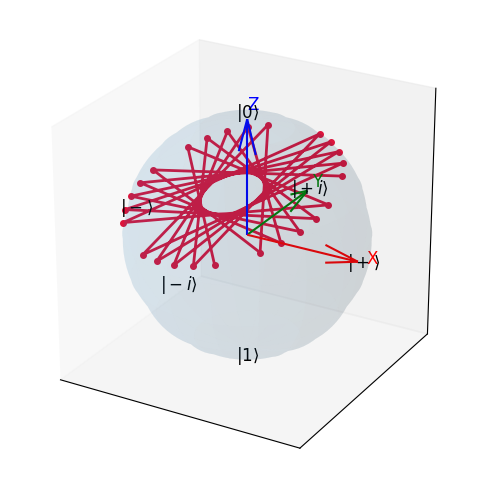

In [15]:
## 19) Visualise a Random Trajectory

U = random_su2(rng=np.random.default_rng(7))
psi0 = angles_to_state(0.9, 0.2)
states = [psi0]
for _ in range(24):
    states.append(U @ states[-1])

ax = plot_path_on_bloch(states, color='crimson')
plt.show()


## 20) Hands-On Submission (Extended)

1. **Measurement demo:** For at least two different initial states and two different axes $\mathbf n$, estimate $P(\pm)$ via sampling and compare to theory.
2. **Tomography:** Reconstruct $\mathbf r$ from Pauli measurements and compare to the analytic $\mathbf r$ for your chosen states.
3. **Random orbit:** Sample a random $U$ and show the trajectory for two different starting states on the Bloch sphere.

Include figures and printed comparisons. Briefly discuss any sampling error you observe.

---

## Bonus: Composing Rotations

Show numerically that
$$
R_x(\alpha)\,R_y(\beta)\,R_z(\gamma)
\quad\text{induces}\quad
R = R_x^{(3D)}(\alpha)\,R_y^{(3D)}(\beta)\,R_z^{(3D)}(\gamma)
$$
on Bloch vectors by comparing $\mathbf r'\,$ from both constructions.


In [16]:
# Bonus check: compare composition on Bloch vectors
def Rx3(a):
    ca, sa = np.cos(a), np.sin(a)
    return np.array([[1,0,0],[0,ca,-sa],[0,sa,ca]], float)

def Ry3(b):
    cb, sb = np.cos(b), np.sin(b)
    return np.array([[cb,0,sb],[0,1,0],[-sb,0,cb]], float)

def Rz3(c):
    cc, sc = np.cos(c), np.sin(c)
    return np.array([[cc,-sc,0],[sc,cc,0],[0,0,1]], float)

alpha, beta, gamma = 0.4, -0.7, 1.1
U = Rx(alpha) @ Ry(beta) @ Rz(gamma)
R_su2 = su2_to_so3(U)
R_3d  = Rx3(alpha) @ Ry3(beta) @ Rz3(gamma)

# Test on random r from a random state
psi = random_su2() @ ket0
r = state_to_bloch(psi)
print("‖(R_su2-R_3d) r‖:", np.linalg.norm((R_su2 - R_3d) @ r))


‖(R_su2-R_3d) r‖: 7.09985019231192e-17


## 21. Reflection
- Pure qubit states are points on the **Bloch sphere**; measurement along axis $\mathbf n$ returns $P(\pm)=\tfrac{1\pm \mathbf n\cdot\mathbf r}{2}$.
- **Single-qubit unitaries** $\leftrightarrow$ **3D rotations** of Bloch vectors: $U\mapsto R\in SO(3)$ via $R_{kj}=\tfrac12\operatorname{Tr}(\sigma_k U\sigma_j U^\dagger)$.
- **Pauli expectations** reconstruct the state: $\mathbf r=(\langle\sigma_x\rangle,\langle\sigma_y\rangle,\langle\sigma_z\rangle)$ (state tomography).
- **Hadamard** and **Pauli** gates are special rotations; $R_n(\vartheta)=e^{-i\vartheta\sigma_n/2}$ gives arbitrary rotations around $n$.



---
### Links
- **Open in Colab (from GitHub):** replace `YOUR_GITHUB_USERNAME/qucode-21days`
  - `https://colab.research.google.com/github/YOUR_GITHUB_USERNAME/qucode-21days/blob/main/Day08_Quantum_Teleportation.ipynb.ipynb`
- **Report an issue / suggest a fix:** link to your repo issues page
